# Prediction de la production ENR

Ce notebook present l'analyse de la production ENR a partir des données météo.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filename_rte = "clean_datasets/rte_agg_daily_2014_2024.csv"
filename_weather = "clean_datasets/solar_wind_data.csv"

In [5]:
data = pd.read_csv(filename_rte)
data.set_index("Date", inplace=True)
data.index = pd.to_datetime(data.index)
# set all 0 to nan
data = data.dropna()
data = data.iloc[:-1]
data

,Type_de_jour_TEMPO,Consommation,Prévision_J-1,Prévision_J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech_physiques,Taux_de_Co2,Ech_comm,sun,wind
Date,,,,,,,,,,,,,,,,,,
2022-02-01,BLEU,1720985.0,1684350.0,1695000.0,4129.0,10563.0,165555.5,1142905.5,227954.0,21938.5,114975.5,-23836.5,27828.0,28968.5,1109.0,38649.5,3.901272e+06,4.906875
2022-02-02,BLANC,1611363.0,1614700.0,1591800.0,3359.0,12788.5,178510.5,1146420.0,138768.0,21271.0,131157.0,-24503.5,28097.5,-24507.5,1240.5,-16471.5,4.494408e+06,3.661905
2022-02-03,BLANC,1619458.0,1606150.0,1604620.0,4135.5,13468.0,182550.0,1157998.5,63557.5,20527.5,143728.0,-16796.0,28782.0,21504.5,1307.0,30110.0,4.781211e+06,2.776255
2022-02-04,BLEU,1592812.0,1577900.0,1559400.0,3455.0,14461.5,163167.5,1151723.5,178764.0,19051.0,143454.0,-22902.5,29688.0,-88055.0,1153.0,-79211.5,4.245190e+06,3.987258
2022-02-05,BLEU,1487617.0,1450800.0,1469800.0,3513.5,536.0,123366.5,1077425.0,145138.0,41271.5,119019.5,-17822.0,30261.0,-35092.0,844.0,-28462.0,7.963900e+06,3.375999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03,BLEU,1209590.0,1197125.0,1212200.0,2997.5,0.0,15469.5,920182.0,264454.0,66768.5,192681.0,-25528.5,18695.5,-246004.0,295.5,0.0,1.129096e+07,4.744227
2024-04-04,BLEU,1165849.5,1170150.0,1166425.0,2997.0,0.0,17460.0,867263.0,285321.0,76581.5,192826.0,-29510.0,19056.5,-266111.0,318.5,0.0,1.328256e+07,4.720689
2024-04-05,BLEU,1113699.5,1122500.0,1101100.0,2998.0,0.0,14497.0,815530.0,232208.5,72847.5,192013.5,-30277.5,19070.5,-204951.5,320.0,0.0,1.423090e+07,4.879554


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 770 entries, 2022-02-01 to 2024-04-07
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type_de_jour_TEMPO  770 non-null    object 
 1   Consommation        770 non-null    float64
 2   Prévision_J-1       770 non-null    float64
 3   Prévision_J         770 non-null    float64
 4   Fioul               770 non-null    float64
 5   Charbon             770 non-null    float64
 6   Gaz                 770 non-null    float64
 7   Nucléaire           770 non-null    float64
 8   Eolien              770 non-null    float64
 9   Solaire             770 non-null    float64
 10  Hydraulique         770 non-null    float64
 11  Pompage             770 non-null    float64
 12  Bioénergies         770 non-null    float64
 13  Ech_physiques       770 non-null    float64
 14  Taux_de_Co2         770 non-null    float64
 15  Ech_comm            770 non-null    fl

<Axes: >

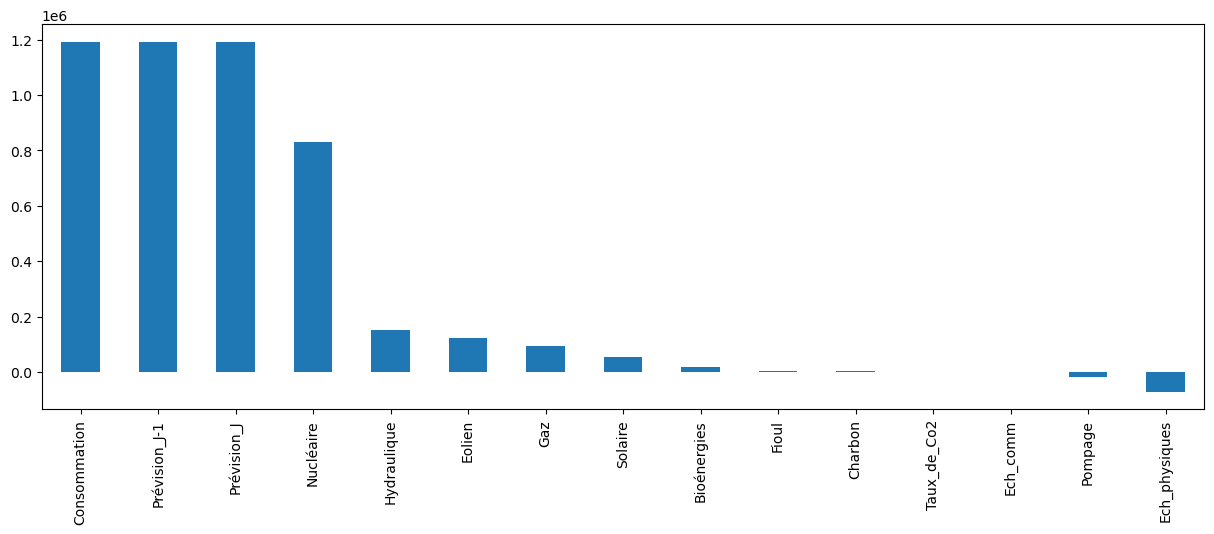

In [25]:
data.drop(['Type_de_jour_TEMPO', "sun", 'wind'], axis=1).mean().sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))

## Some investigations

Text(0.5, 1.0, 'Wind and Solar Power daily Production in France')

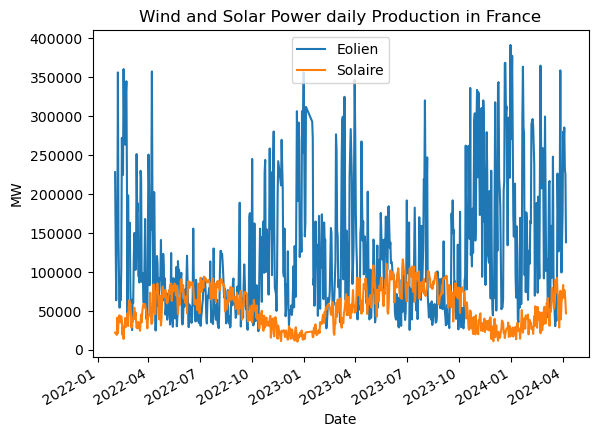

In [13]:
ax1 = data[['Eolien', 'Solaire']].plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("MW")
ax1.set_title("Wind and Solar Power daily Production in France")

Text(0.5, 1.0, 'Wind speed and Solar Flux in France')

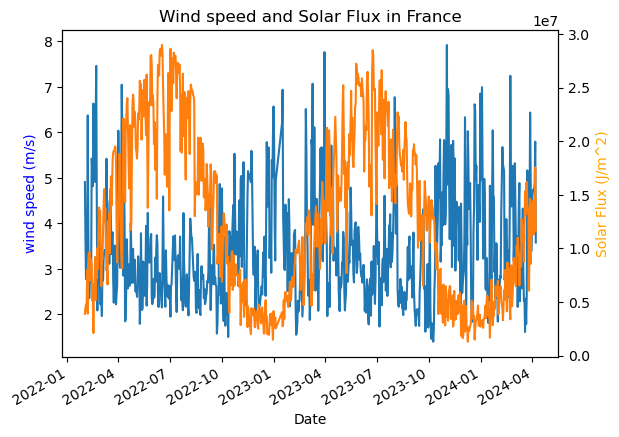

In [18]:
ax1 = data['wind'].plot()
ax1 = data['sun'].plot(ax=ax1, secondary_y=True)

ax1.set_xlabel("Date")
ax1.set_ylabel("wind speed (m/s)", c="b")
ax1.set_ylabel("Solar Flux (J/m^2)", c="orange")
ax1.set_title("Wind speed and Solar Flux in France")

## Regardons les correlations entre l'énergie produite et la production ENR

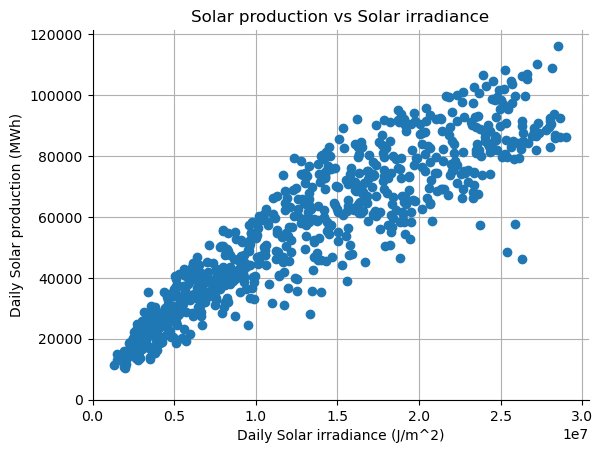

In [19]:
X_sun = data["sun"]
Y_pv = data["Solaire"]

fig, ax1 = plt.subplots()
ax1.plot(X_sun, Y_pv, 'o', label="Data")
ax1.set_xlabel("Daily Solar irradiance (J/m^2)")
ax1.set_ylabel("Daily Solar production (MWh)")
ax1.set_title("Solar production vs Solar irradiance")
ax1.set_ylim(ymin=0)
ax1.set_xlim(xmin=0)
ax1.grid()
#hide the top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


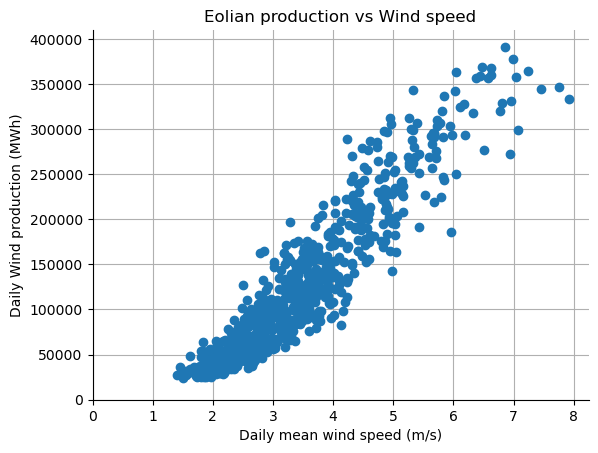

In [20]:
X_sun = data["wind"]
Y_pv = data["Eolien"]

fig, ax1 = plt.subplots()
ax1.plot(X_sun, Y_pv, 'o', label="Data")
ax1.set_xlabel("Daily mean wind speed (m/s)")
ax1.set_ylabel("Daily Wind production (MWh)")
ax1.set_title("Eolian production vs Wind speed")
ax1.set_ylim(ymin=0)
ax1.set_xlim(xmin=0)
ax1.grid()
#hide the top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


In [26]:
data["Fossile"] = data["Gaz"] + data["Charbon"] + data["Fioul"]
data["nonENR"] = data["Fossile"] + data["Nucléaire"] + data["Hydraulique"] + data["Bioénergies"] + data["Pompage"]
data["ENR"] = data["Eolien"] + data["Solaire"]

# prediction of the ENR productions

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [39]:
train_date = "2023-12-31"

In [54]:
data_train = data.loc[data.index < train_date]
data_test = data.loc[data.index >= train_date]

## Prediction du solair



In [94]:
def fit_model(data_train, data_test, features, target):
    X_train = data_train[features]
    y_train = data_train[target]
    X_test = data_test[features]
    y_test = data_test[target]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    score = model.score(X_train, y_train)
    return model, mape, rmse, score

In [95]:
model_sun, mape_sun, rmse_sun, score_sun = fit_model(data_train, data_test, ["sun"], "Solaire")

print(f"Score: {score_sun}")
print(f"MARE: {mape_sun}")


Score: 0.8396521093233686
MARE: 0.18144202874155127


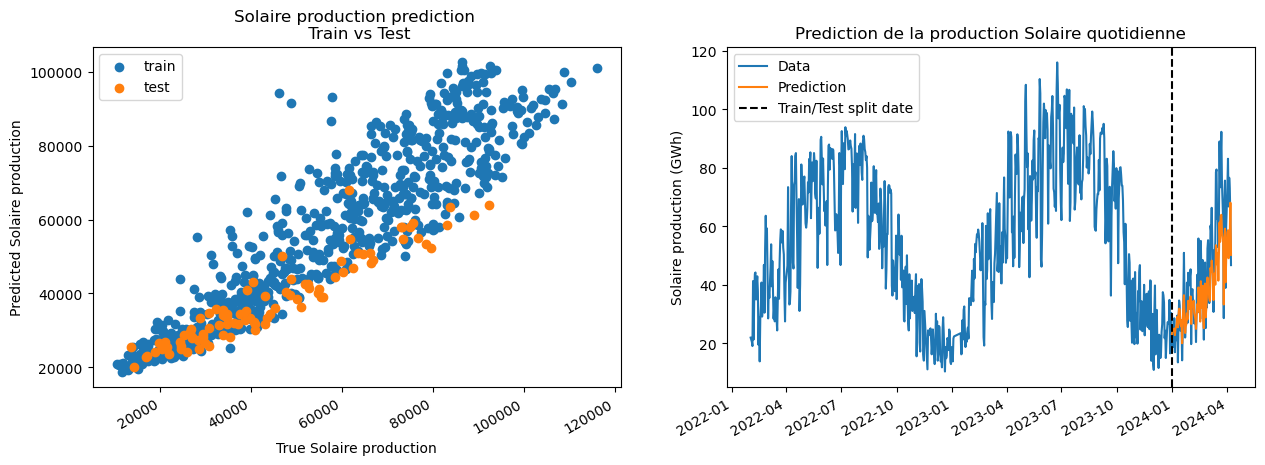

In [96]:
def plot_model(data_train, data_test, model, features, target):
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))
    ax1.scatter(data_train[target], model.predict(data_train[features]), label="train")
    ax1.scatter(data_test[target], model.predict(data_test[features]), label="test")
    ax1.legend()
    ax1.set_xlabel(f"True {target} production")
    ax1.set_ylabel(f"Predicted {target} production")
    ax1.set_title(f"{target} production prediction \n Train vs Test")

    factor = 1e-3
    ax2.plot(data.index, data[target] * factor, label="Data")
    ax2.plot(data_test.index, model.predict(data_test[features]) * factor, label="Prediction")

    ax_line = pd.to_datetime(train_date).timestamp() / 86400
    ax2.axvline(ax_line, color="k", linestyle="--", label = "Train/Test split date")
    ax2.legend()
    ax2.set_title(f"Prediction de la production {target} quotidienne" )
    ax2.set_ylabel(f"{target} production (GWh)")
    fig.autofmt_xdate()

plot_model(data_train, data_test, model_sun, ["sun"], "Solaire")


## conclusion

La production solaire est sous-estimé en 2024, certainement lié à une croissance du nombre d'installation.

## Wind

In [97]:
model_wind, mape_wind, rmse_wind, score_wind = fit_model(data_train, data_test, ["wind"], "Eolien")

print(f"Score: {score_wind}")
print(f"MARE: {mape_wind}")

Score: 0.8765170691061654
MARE: 0.21675181746534675


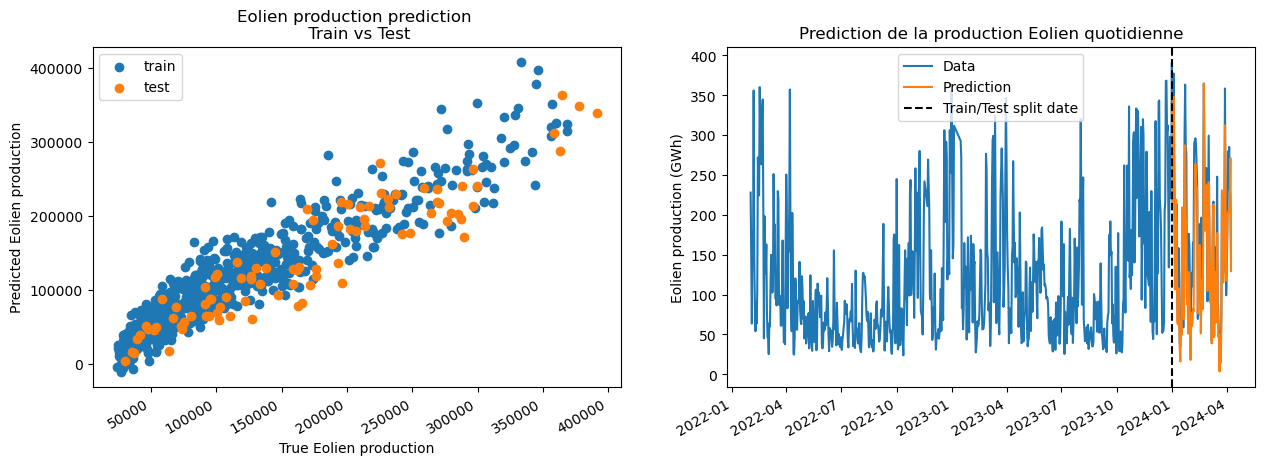

In [98]:
plot_model(data_train, data_test, model_wind, ["wind"], "Eolien")

# Somme des ENR

Peut-on fitter directement la somme des deux ?

In [99]:
model_enr, mape_enr, rmse_enr, score_enr = fit_model(data_train, data_test, ["sun", "wind"], "ENR")

print(f"Score: {score_enr}")
print(f"MARE: {mape_enr}")

Score: 0.8171516178936171
MARE: 0.16419562389067235


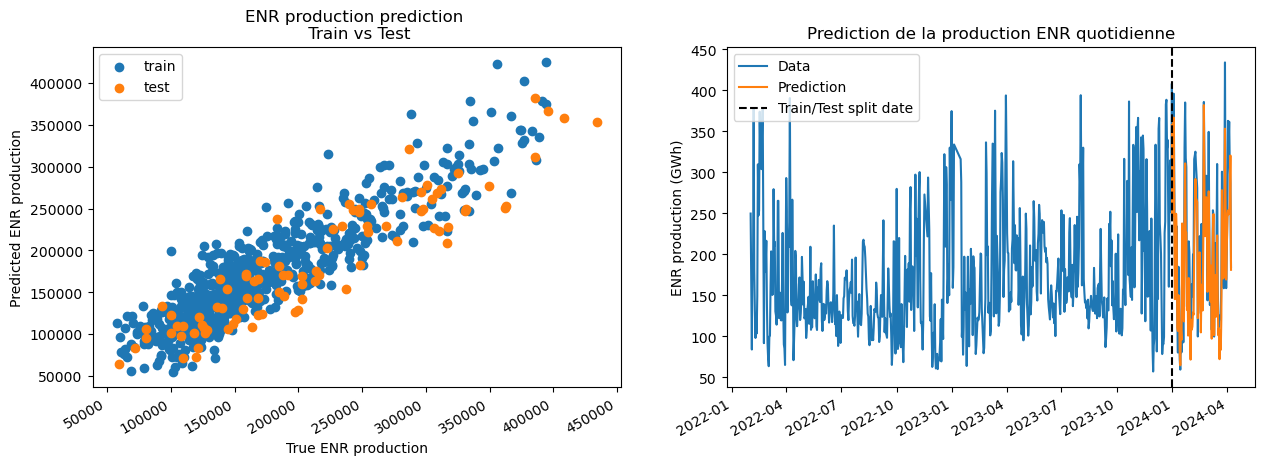

In [100]:
plot_model(data_train, data_test, model_enr, ["sun", "wind"], "ENR")

## conclusion

La production eolien est bien plus important que la production solair, donc on retrouve principalement la même performance que le modèle vent seul.

Ce n'est pas si mauvais, étant donné la faible qualité des données d'entrée.

# prediction of the Fossile Energy form weather data


Score: 0.7049852006317248
MARE: 0.818793624841333


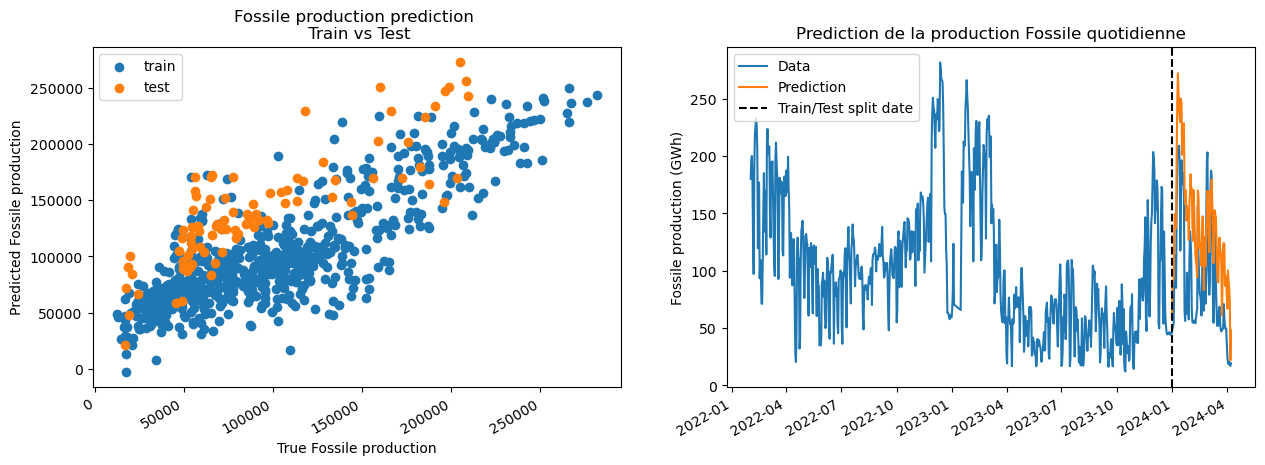

In [101]:
model_fossile, mape_fossile, rmse_fossile, score_fossile = fit_model(data_train, data_test, ["sun", "wind", "Prévision_J-1"], "Fossile")

print(f"Score: {score_fossile}")
print(f"MARE: {mape_fossile}")

plot_model(data_train, data_test, model_fossile, ["sun", "wind", "Prévision_J-1"], "Fossile")

Score: 0.7492686835302059
MARE: 0.10915357088348647


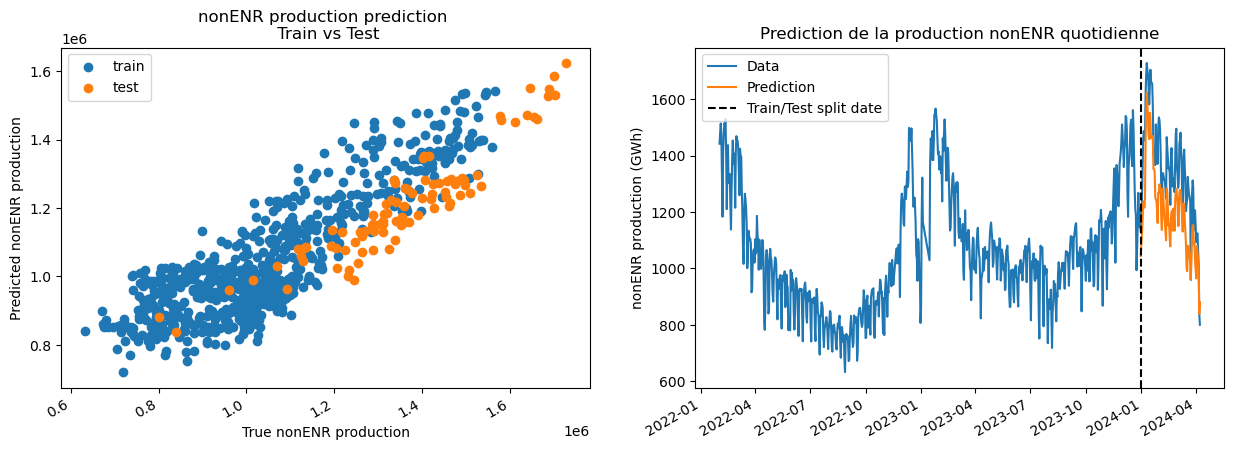

In [102]:
model_nonenr, mape_nonenr, rmse_nonenr, score_nonenr = fit_model(data_train, data_test, ["sun", "wind", "Prévision_J-1"], "nonENR")

print(f"Score: {score_nonenr}")
print(f"MARE: {mape_nonenr}")

plot_model(data_train, data_test, model_nonenr, ["sun", "wind", "Prévision_J-1"], "nonENR")

## Conclusion

La prévision des énergies fossiles est trèd mauvais, en particulier par rapport à la prediction de la consomation non-ENR.
Celà est en particulier du a l'important du nucleaire et de l'hydrolique dans le mix électrique Francais, deux source d'énergies décarbonnées mais controlable (indépendant de la météo).

## Discussion

Possibilitées pour améliorer la prédiction:

1. le nucléaire et l'hydrolique peuvent avoir une certaine inertie dans leurs production. Inclure un Lag peut potentielement permetre de mieux prédire leurs production future.
2. La prédiction ENR est elle-même mauvaise... Pour l'améliorer, il peut être intéressant de réduire la zone géographique d'aggreggation, par example au niveau de la région, afin de permettre des variations locale de la météo.


# prediction des classes Tempos

In [117]:
data["weekend"] = data.index.weekday.isin([5, 6]).astype(int)

/home/ubuntu/.local/mambaforge/envs/latest/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/.local/mambaforge/envs/latest/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ubuntu/.local/mambaforge/envs/latest/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ubuntu/.local/m

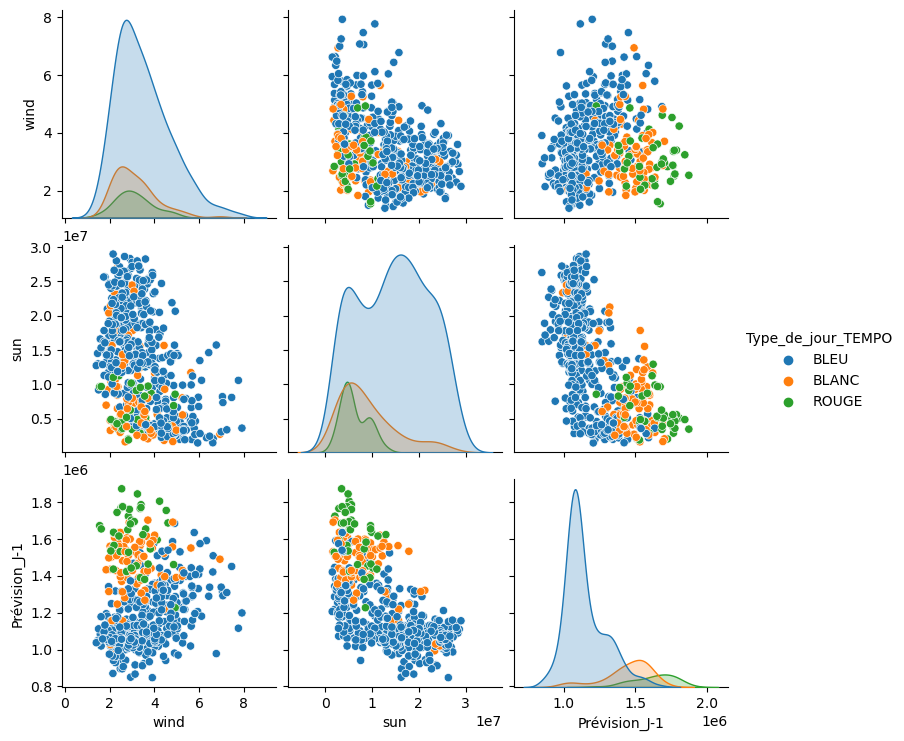

In [119]:
# plot the Type_de_jour_TEMPO classifcation
import seaborn as sns

sns.pairplot(data[data["weekend"] == 0][["wind", "sun", "Prévision_J-1", "Type_de_jour_TEMPO"]], hue="Type_de_jour_TEMPO")

In [128]:
from sklearn.svm import SVC


In [147]:
model_tempo = SVC(class_weight="balanced")

train_date = "2023-12-31"
features = ["sun", "wind", "Prévision_J-1", "weekend"]
code = {"BLEU": 0, "BLANC": 1, "ROUGE": 2}
data["target"] = data["Type_de_jour_TEMPO"].map(code)

data_train = data.loc[data.index < train_date].loc[data["weekend"] == 0]
data_test = data.loc[data.index >= train_date].loc[data["weekend"] == 0]

display(data_train[features + ["target"]])
display(data_test["target"].value_counts())
model_tempo.fit(data_train[features], data_train["target"])

,sun,wind,Prévision_J-1,weekend,target
Date,,,,,
2022-02-01,3.901272e+06,4.906875,1684350.0,0,0
2022-02-02,4.494408e+06,3.661905,1614700.0,0,1
2022-02-03,4.781211e+06,2.776255,1606150.0,0,1
2022-02-04,4.245190e+06,3.987258,1577900.0,0,0
2022-02-07,7.807839e+06,3.903952,1550200.0,0,1
...,...,...,...,...,...
2023-12-22,2.462717e+06,6.475990,1338325.0,0,0
2023-12-26,3.994388e+06,3.196827,1229225.0,0,0
2023-12-27,4.682368e+06,4.413843,1320950.0,0,0


target
0    30
1    18
2    17
Name: count, dtype: int64

SVC(class_weight='balanced')

In [148]:
score = model_tempo.score(data_test[features], data_test["target"])
print("Score: ", score)

Score:  0.4


In [149]:
performance_matrix = pd.DataFrame(index=["True Blue", "True White", "True Red"], columns=["Pred Blue", "Pred White", "Pred Red"])
prevision = model_tempo.predict(data_test[features])
true_class = data_test["target"]
for label_true, code_true in code.items():
    for label_pred, code_pred in code.items():
        performance_matrix.iloc[code_true, code_pred] = np.sum((prevision == code_pred) & (true_class == code_true))


In [151]:
performance_matrix

,Pred Blue,Pred White,Pred Red
True Blue,10,5,15
True White,0,1,17
True Red,0,2,15


In [152]:
model_tempo_unbalanced = SVC(class_weight=None)

model_tempo_unbalanced.fit(data_train[features], data_train["target"])
score = model_tempo_unbalanced.score(data_test[features], data_test["target"])
print("Score: ", score)

prevision = model_tempo_unbalanced.predict(data_test[features])
for label_true, code_true in code.items():
    for label_pred, code_pred in code.items():
        performance_matrix.iloc[code_true, code_pred] = np.sum((prevision == code_pred) & (true_class == code_true))
performance_matrix


Score:  0.46153846153846156


,Pred Blue,Pred White,Pred Red
True Blue,30,0,0
True White,18,0,0
True Red,17,0,0


In [155]:
from sklearn.tree import DecisionTreeClassifier
model_tempo_tree = DecisionTreeClassifier(class_weight=None)

model_tempo_tree.fit(data_train[features], data_train["target"])
score = model_tempo_tree.score(data_test[features], data_test["target"])
print("Score: ", score)

prevision = model_tempo_tree.predict(data_test[features])
for label_true, code_true in code.items():
    for label_pred, code_pred in code.items():
        performance_matrix.iloc[code_true, code_pred] = np.sum((prevision == code_pred) & (true_class == code_true))
performance_matrix


Score:  0.676923076923077


,Pred Blue,Pred White,Pred Red
True Blue,26,4,0
True White,8,10,0
True Red,4,5,8


In [156]:
model_tempo_tree_balanced = DecisionTreeClassifier(class_weight="balanced")

model_tempo_tree_balanced.fit(data_train[features], data_train["target"])
score = model_tempo_tree_balanced.score(data_test[features], data_test["target"])
print("Score: ", score)

prevision = model_tempo_tree_balanced.predict(data_test[features])
for label_true, code_true in code.items():
    for label_pred, code_pred in code.items():
        performance_matrix.iloc[code_true, code_pred] = np.sum((prevision == code_pred) & (true_class == code_true))
performance_matrix


Score:  0.6461538461538462


,Pred Blue,Pred White,Pred Red
True Blue,29,1,0
True White,11,7,0
True Red,8,3,6


In [159]:
model_tempo_tree_balanced = DecisionTreeClassifier(class_weight="balanced")
features_cheating = ["ENR", "Prévision_J-1"]
model_tempo_tree_balanced.fit(data_train[features_cheating], data_train["target"])
score = model_tempo_tree_balanced.score(data_test[features_cheating], data_test["target"])
print("Score: ", score)

prevision = model_tempo_tree_balanced.predict(data_test[features_cheating])
for label_true, code_true in code.items():
    for label_pred, code_pred in code.items():
        performance_matrix.iloc[code_true, code_pred] = np.sum((prevision == code_pred) & (true_class == code_true))
performance_matrix


Score:  0.6923076923076923


,Pred Blue,Pred White,Pred Red
True Blue,30,0,0
True White,10,8,0
True Red,7,3,7


# Conclusion

La classification supervisée des jours tempo ne marche pas si directement que ça.
Lorsqu'on regarde le pairplot, on voit que les classes sont très mélangées. 

de plus, il y a beaucoup plus de jours bleu que de jours rouge et blanc (dataset imbalanced)

Ainsi, si on ne corrige pas la difference des classes, le model SVM ne prédit que des jours bleu. Si on corrige, le model SVM prédit beaucoup trop de jours rouges.

Un model de Decision Tree est un peu plus nuancé, mais avec un score pas si bon que ça.

Même en trichant, et en utilisant les véritable données de production ENR mesurée, la prédiction laisse a désirer...

## Discussion

Une solution serait d'implémenter directement le modèle utilisé par RTE : https://www.services-rte.com/files/live/sites/services-rte/files/pdf/20160106_Methode_de_choix_des_jours_Tempo.pdf